In [1]:
#Importing required libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#Setting working directory
os.chdir("C:\\Users\\akhil\Desktop\\Kriti Data\\EDWISOR_invoice\\data science study material\\Project")

#Check for working directory
os.getcwd()
#Loading csv file data into Credit_Card_Data object
Credit_Card_Data=pd.read_csv("credit-card-data.csv",sep=",")

#Check for loaded data
Credit_Card_Data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [3]:
#################################  MISSING VALUE ANALYSIS ##############################################

#Finding number of missing values in the variables
Miss_value=pd.DataFrame(Credit_Card_Data.isnull().sum())
Miss_value

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [4]:

#Only variable Credit_limit and Minimum_payments contains missing value so calculating missing percentage to compute missing values

#Missing value percentage of variable CREDIT_LIMIT 
Miss_value_CREDIT_LIMIT = pd.DataFrame(Credit_Card_Data, columns =["CREDIT_LIMIT"])
Miss_value_CREDIT_LIMIT_Sum=pd.DataFrame(Miss_value_CREDIT_LIMIT.isnull().sum())
Miss_value_CREDIT_LIMIT_per = (Miss_value_CREDIT_LIMIT_Sum/Credit_Card_Data.shape[0])*100
Miss_value_CREDIT_LIMIT_per


,0
CREDIT_LIMIT,0.011173


In [5]:
#Missing value percentage of variable MINIMUM_PAYMENTS
Miss_value_MINIMUM_PAYMENTS = pd.DataFrame(Credit_Card_Data, columns =["MINIMUM_PAYMENTS"])
Miss_value_MINIMUM_PAYMENTS_Sum=pd.DataFrame(Miss_value_MINIMUM_PAYMENTS.isnull().sum())
Miss_value_MINIMUM_PAYMENTS_per = (Miss_value_MINIMUM_PAYMENTS_Sum/Credit_Card_Data.shape[0])*100
Miss_value_MINIMUM_PAYMENTS_per



,0
MINIMUM_PAYMENTS,3.497207


In [6]:
#Since missing value percentage is below 30% we need to compute it.Using mean method for computing missing value since.
#I tried many times to compute it by KNN imputation but fancyimpute package is not supported by my version of python

Credit_Card_Data["CREDIT_LIMIT"]=Credit_Card_Data["CREDIT_LIMIT"].fillna(Credit_Card_Data["CREDIT_LIMIT"].mean())
Credit_Card_Data["MINIMUM_PAYMENTS"]=Credit_Card_Data["MINIMUM_PAYMENTS"].fillna(Credit_Card_Data["MINIMUM_PAYMENTS"].mean())

#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Credit_Card_Data.isnull().sum())
Miss_value



,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


{'whiskers': [<matplotlib.lines.Line2D at 0x1b198f71dc8>,
 'caps': [<matplotlib.lines.Line2D at 0x1b198f7eec8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b198f71288>],
 'medians': [<matplotlib.lines.Line2D at 0x1b198f81fc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b198f81f48>],
 'means': []}

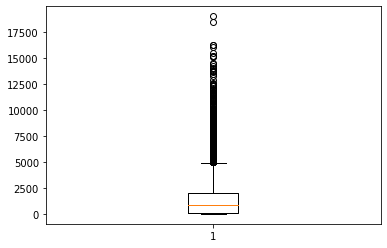

In [7]:
##################################### OUTLIER ANALYSIS ##############################################



#Plot boxplot to visualize outliers
%matplotlib inline

plt.boxplot(Credit_Card_Data["BALANCE"])
#plt.boxplot(Credit_Card_Data["BALANCE_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["PURCHASES"])
#plt.boxplot(Credit_Card_Data["ONEOFF_PURCHASES"])
#plt.boxplot(Credit_Card_Data["INSTALLMENTS_PURCHASES"])
#plt.boxplot(Credit_Card_Data["CREDIT_LIMIT"])
#plt.boxplot(Credit_Card_Data["CASH_ADVANCE"])
#plt.boxplot(Credit_Card_Data["PURCHASES_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["ONEOFF_PURCHASES_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["PURCHASES_INSTALLMENTS_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["CASH_ADVANCE_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["CASH_ADVANCE_TRX"])
#plt.boxplot(Credit_Card_Data["PURCHASES_TRX"])
#plt.boxplot(Credit_Card_Data["PAYMENTS"])
#plt.boxplot(Credit_Card_Data["MINIMUM_PAYMENTS"])
#plt.boxplot(Credit_Card_Data["PRC_FULL_PAYMENT"])
#plt.boxplot(Credit_Card_Data["TENURE"])






In [8]:
#Saving Numeric Column names
Cnames=["BALANCE","BALANCE_FREQUENCY","TENURE","PRC_FULL_PAYMENT","MINIMUM_PAYMENTS","PAYMENTS","PURCHASES_TRX","CASH_ADVANCE_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CREDIT_LIMIT","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY"]

# Detect and delete outliers from data because outliers present in the dataset in large amount so imputing it by mean or median is creating duplicate values.
for i in Cnames:
    q75,q25=np.percentile(Credit_Card_Data.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    Credit_Card_Data=Credit_Card_Data.drop(Credit_Card_Data[Credit_Card_Data.loc[:,i]<min].index )
    Credit_Card_Data=Credit_Card_Data.drop(Credit_Card_Data[Credit_Card_Data.loc[:,i]>max].index )

#Check dataset
Credit_Card_Data.shape


(2386, 18)

In [9]:

#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Credit_Card_Data.isnull().sum())
Miss_value


,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [10]:
############################### ADVANCED DATA PREPARATION #####################################################

Credit_Card_Data["MONTHLY_AVERAGE_PURCHASE"] = Credit_Card_Data["PURCHASES"]/(Credit_Card_Data["PURCHASES_FREQUENCY"]*Credit_Card_Data["TENURE"])
Credit_Card_Data["LIMIT_USAGE"]=Credit_Card_Data["BALANCE"]/Credit_Card_Data["CREDIT_LIMIT"]
Credit_Card_Data["PAYMENTS_TO_MINIMUM_PAYMENT_RATIO"] = Credit_Card_Data["PAYMENTS"]/Credit_Card_Data["MINIMUM_PAYMENTS"]
Credit_Card_Data["AVERAGE_AMOUNT_PER_PURCHASE"]=Credit_Card_Data["PURCHASES"]/Credit_Card_Data["PURCHASES_TRX"]
Credit_Card_Data["MONTHLY_CASH_ADVANCE"] = Credit_Card_Data["CASH_ADVANCE"]/(Credit_Card_Data["CASH_ADVANCE_FREQUENCY"]*Credit_Card_Data["TENURE"])
Credit_Card_Data["MONTHLY_INSTALLMENTS_PURCHASES"] = Credit_Card_Data["INSTALLMENTS_PURCHASES"]/(Credit_Card_Data["PURCHASES_INSTALLMENTS_FREQUENCY"]*Credit_Card_Data["TENURE"])
Credit_Card_Data["MONTHLY_ONEOFF_PURCHASES"] = Credit_Card_Data["ONEOFF_PURCHASES"]/(Credit_Card_Data["ONEOFF_PURCHASES_FREQUENCY"]*Credit_Card_Data["TENURE"])
Credit_Card_Data["MONTHLY_CASH_ADVANCE_TRANSACTION"] = Credit_Card_Data["CASH_ADVANCE"]/Credit_Card_Data["CASH_ADVANCE_TRX"]

#Checking dataset
Credit_Card_Data



,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,MONTHLY_AVERAGE_PURCHASE,LIMIT_USAGE,PAYMENTS_TO_MINIMUM_PAYMENT_RATIO,AVERAGE_AMOUNT_PER_PURCHASE,MONTHLY_CASH_ADVANCE,MONTHLY_INSTALLMENTS_PURCHASES,MONTHLY_ONEOFF_PURCHASES,MONTHLY_CASH_ADVANCE_TRANSACTION
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0.000000,12,47.699905,0.040901,1.446508,47.700000,NaN,95.400382,NaN,NaN
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0.000000,12,16.000064,0.681429,2.771075,16.000000,NaN,NaN,16.000064,NaN
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,...,0.000000,12,36.350000,0.792892,1.276357,36.350000,NaN,36.350000,NaN,NaN
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,...,0.000000,12,215.372715,0.144989,2.206280,172.298000,NaN,66.666667,661.492646,NaN
14,C10015,2772.772734,1.000000,0.00,0.00,0.00,346.811390,0.000000,0.000000,0.000000,...,0.000000,12,NaN,0.924258,0.813816,NaN,346.812777,NaN,NaN,346.811390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,C18972,35.389850,1.000000,285.24,0.00,285.24,0.000000,1.000000,0.000000,0.916667,...,0.363636,12,23.770000,0.035390,1.320173,23.770000,NaN,25.930900,NaN,NaN
8742,C18980,87.026009,1.000000,605.52,0.00,605.52,0.000000,1.000000,0.000000,0.916667,...,0.000000,12,50.460000,0.058017,2.923430,50.460000,NaN,55.047253,NaN,NaN
8747,C18986,16.428326,0.909091,441.50,124.70,316.80,0.000000,1.000000,0.166667,0.916667,...,0.333333,12,36.791667,0.016428,5.283648,31.535714,NaN,28.799990,62.349875,NaN
8759,C18998,67.377243,1.000000,295.00,0.00,295.00,0.000000,0.500000,0.000000,0.416667,...,0.300000,12,49.166667,0.067377,1.470084,49.166667,NaN,58.999953,NaN,NaN


In [11]:

#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Credit_Card_Data.isnull().sum())
Miss_value



,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


In [12]:


Credit_Card_Data["MONTHLY_AVERAGE_PURCHASE"]=Credit_Card_Data["MONTHLY_AVERAGE_PURCHASE"].fillna(Credit_Card_Data["MONTHLY_AVERAGE_PURCHASE"].mean())
Credit_Card_Data["AVERAGE_AMOUNT_PER_PURCHASE"]=Credit_Card_Data["AVERAGE_AMOUNT_PER_PURCHASE"].fillna(Credit_Card_Data["AVERAGE_AMOUNT_PER_PURCHASE"].mean())
Credit_Card_Data["MONTHLY_CASH_ADVANCE"]=Credit_Card_Data["MONTHLY_CASH_ADVANCE"].fillna(Credit_Card_Data["MONTHLY_CASH_ADVANCE"].mean())
Credit_Card_Data["MONTHLY_INSTALLMENTS_PURCHASES"]=Credit_Card_Data["MONTHLY_INSTALLMENTS_PURCHASES"].fillna(Credit_Card_Data["MONTHLY_INSTALLMENTS_PURCHASES"].mean())
Credit_Card_Data["MONTHLY_ONEOFF_PURCHASES"]=Credit_Card_Data["MONTHLY_ONEOFF_PURCHASES"].fillna(Credit_Card_Data["MONTHLY_ONEOFF_PURCHASES"].mean())
Credit_Card_Data["MONTHLY_CASH_ADVANCE_TRANSACTION"]=Credit_Card_Data["MONTHLY_CASH_ADVANCE_TRANSACTION"].fillna(Credit_Card_Data["MONTHLY_CASH_ADVANCE_TRANSACTION"].mean())

#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Credit_Card_Data.isnull().sum())
Miss_value

#Writing the KPI dataset into the csv file
#Credit_Card_Data.to_csv("Derived_KPI_Python.csv",index= False)

,0
CUST_ID,0
BALANCE,0
BALANCE_FREQUENCY,0
PURCHASES,0
ONEOFF_PURCHASES,0
INSTALLMENTS_PURCHASES,0
CASH_ADVANCE,0
PURCHASES_FREQUENCY,0
ONEOFF_PURCHASES_FREQUENCY,0
PURCHASES_INSTALLMENTS_FREQUENCY,0


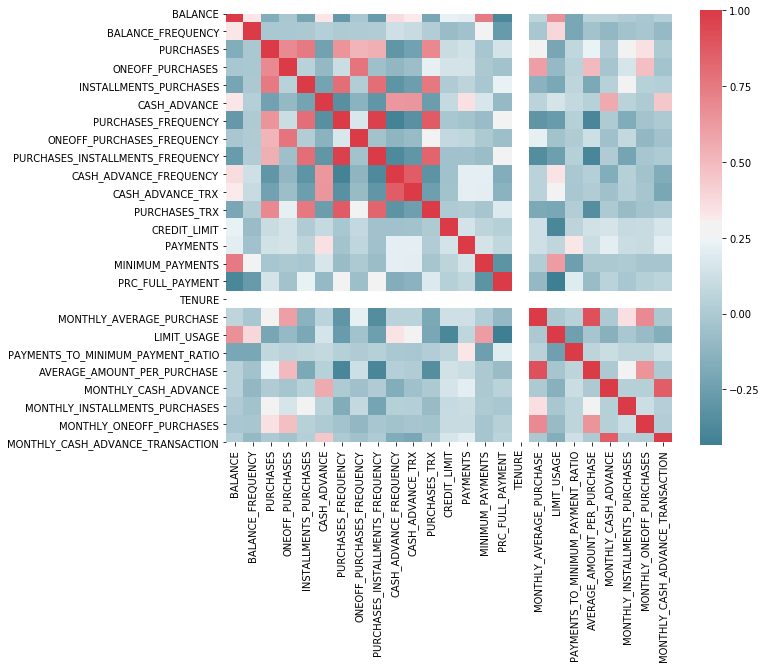

In [13]:
################################### FEATURE SELECTION #############################################################
 
#Plotting correlation graph for the variables to look the correlation among variables.
#For reduction of the data I am using Factor Analysis that is why not dropping columns by looking into the correlation plot.

#Set the width and height of the plot
f,ax=plt.subplots(figsize=(10,8))

#Generating correlation matrix
corr=Credit_Card_Data.corr()

#Plot using seaborn library
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap=sns.diverging_palette(220,10,as_cmap=True),square=True,ax=ax)




In [14]:

############################################# FACTOR ANALYSIS ####################################################

#Loading csv file data into Credit_Card_Data object
Credit_Card_Data1=pd.read_csv("credit-card-data.csv",sep=",")

#Dropping categorical variable for computing loadings
Credit_Card_Data1=Credit_Card_Data1.drop(["CUST_ID"],axis=1)


In [15]:
#Create factor analysis object and perform factor analysis using random no of factors
fa = FactorAnalyzer(n_factors=6,rotation="varimax")
fa.fit(Credit_Card_Data1)


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=6, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [16]:
#Extracting loadings
loading=fa.loadings_
#Check for loadings
loading


array([[ 0.09806281, -0.06107016,  0.28432516,  0.87615293,  0.07541759,
         0.36747411],
       [ 0.04841717,  0.20082362,  0.1449082 ,  0.33739635,  0.21793668,
        -0.06243859],
       [ 0.97587809,  0.21070448, -0.07802712,  0.08347717,  0.13541129,
         0.08458256],
       [ 0.82523208,  0.00533117, -0.05489563,  0.01779491,  0.29009276,
         0.12125943],
       [ 0.54123724,  0.48793844, -0.08035176,  0.13479604, -0.10150008,
         0.08895366],
       [-0.01784736, -0.09774277,  0.70620787,  0.1545424 , -0.08317565,
         0.45244868],
       [ 0.1441214 ,  0.86221511, -0.16351159, -0.05018351,  0.35417646,
         0.04014554],
       [ 0.35305544,  0.16231121, -0.07314447, -0.03095046,  0.83091274,
         0.12811212],
       [ 0.1170871 ,  0.94531582, -0.12453273,  0.01879683, -0.04015627,
        -0.00899201],
       [-0.03279619, -0.16055903,  0.89152176,  0.23353102,  0.01339853,
        -0.06418237],
       [-0.0067468 , -0.06593682,  0.84007598,  0.

In [17]:
#Check Eigenvalues to know no of factors to be extract 
#The output of the eigenvalues states 5 factors to be built because only 5 values are greater than one 
ev, v = fa.get_eigenvalues()
ev


array([4.64060413e+00, 3.45334253e+00, 1.49824089e+00, 1.27151915e+00,
       1.05820397e+00, 9.75809596e-01, 8.30182344e-01, 7.30864552e-01,
       6.45703978e-01, 5.23600386e-01, 4.03282677e-01, 3.01472838e-01,
       2.42735664e-01, 2.06876326e-01, 1.72153395e-01, 4.53959227e-02,
       1.16488555e-05])

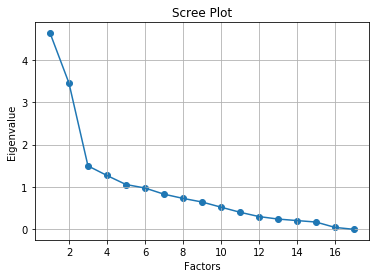

In [18]:

# Create scree plot using matplotlib to extract no of factors to be built
plt.scatter(range(1,Credit_Card_Data1.shape[1]+1),ev)
plt.plot(range(1,Credit_Card_Data1.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()


In [19]:
# Create factor analysis object and perform factor analysis using 5 factors
fa = FactorAnalyzer(n_factors=5,rotation="varimax")
fa.fit(Credit_Card_Data1)
loading=fa.loadings_

#Getting loadings
loading

array([[ 0.15849411,  0.35733746, -0.07729949,  0.92031906,  0.06978311],
       [ 0.00912244,  0.13582311,  0.19638299,  0.30015241,  0.22555171],
       [ 0.95317587, -0.10991832,  0.22813395,  0.085697  ,  0.14170784],
       [ 0.81947606, -0.07584898,  0.02071417,  0.03408159,  0.29077906],
       [ 0.5297914 , -0.08744858,  0.49483868,  0.15056983, -0.0940816 ],
       [ 0.10884652,  0.74990749, -0.11170176,  0.21890368, -0.08478118],
       [ 0.14177557, -0.17008171,  0.85229686, -0.01194836,  0.36005825],
       [ 0.3768307 , -0.07824214,  0.15708939,  0.00847236,  0.82174174],
       [ 0.09220126, -0.13015988,  0.95521021,  0.03806457, -0.03275764],
       [-0.05494044,  0.83568677, -0.15859058,  0.15967263,  0.01866161],
       [ 0.00816039,  0.87002687, -0.0578359 ,  0.08829818,  0.01210009],
       [ 0.55044608, -0.0882361 ,  0.49409719,  0.14399043,  0.26362028],
       [ 0.38506615,  0.1707119 ,  0.04163499,  0.36429153,  0.13701145],
       [ 0.70165282,  0.31960258,  0.0

In [20]:
# Get variance of each factors
fa.get_factor_variance()

#Total 61% cumulative Variance explained by the 5 factors.


(array([3.05989293, 2.41390109, 2.35923371, 1.49197266, 1.07943201]),
 array([0.1799937 , 0.14199418, 0.13877845, 0.0877631 , 0.063496  ]),
 array([0.1799937 , 0.32198788, 0.46076634, 0.54852943, 0.61202544]))

In [21]:
#Dropping columns from the dataset as per Factor Analysis to compute cluster.
Credit_Card_Data1=Credit_Card_Data1.drop(["BALANCE_FREQUENCY","PURCHASES_TRX","CREDIT_LIMIT","MINIMUM_PAYMENTS","PRC_FULL_PAYMENT","TENURE"],axis=1)

#Checking Dimensions of the dataset
Credit_Card_Data1.shape


(8950, 11)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b19b625308>,
 'caps': [<matplotlib.lines.Line2D at 0x1b19b625bc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b19b622888>],
 'medians': [<matplotlib.lines.Line2D at 0x1b19b62ab48>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b19b62f9c8>],
 'means': []}

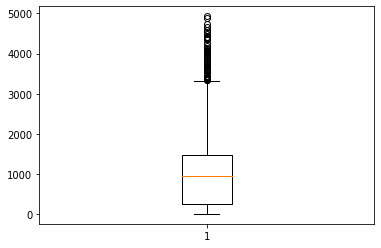

In [22]:
#Checking the number of missing values in the variables after computing missing value.
Miss_value=pd.DataFrame(Credit_Card_Data1.isnull().sum())
Miss_value

##################################### OUTLIER ANALYSIS ##############################################



#Plot boxplot to visualize outliers
%matplotlib inline

plt.boxplot(Credit_Card_Data["BALANCE"])
#plt.boxplot(Credit_Card_Data["PURCHASES"])
#plt.boxplot(Credit_Card_Data["ONEOFF_PURCHASES"])
#plt.boxplot(Credit_Card_Data["INSTALLMENTS_PURCHASES"])
#plt.boxplot(Credit_Card_Data["CASH_ADVANCE"])
#plt.boxplot(Credit_Card_Data["PURCHASES_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["ONEOFF_PURCHASES_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["PURCHASES_INSTALLMENTS_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["CASH_ADVANCE_FREQUENCY"])
#plt.boxplot(Credit_Card_Data["CASH_ADVANCE_TRX"])
#plt.boxplot(Credit_Card_Data["PAYMENTS"])



In [23]:
#Saving Numeric Column names
Cnames=["BALANCE","PAYMENTS","CASH_ADVANCE_FREQUENCY","PURCHASES_INSTALLMENTS_FREQUENCY","PURCHASES","ONEOFF_PURCHASES","INSTALLMENTS_PURCHASES","CASH_ADVANCE","PURCHASES_FREQUENCY","ONEOFF_PURCHASES_FREQUENCY"]

# Detect and delete outliers from data because outliers present in the dataset in large amount so imputing it by mean or median is creating duplicate values.
for i in Cnames:
    q75,q25=np.percentile(Credit_Card_Data1.loc[:,i],[75,25])
    iqr=q75-q25
    min=q25-(iqr*1.5)
    max=q75+(iqr*1.5)
    Credit_Card_Data=Credit_Card_Data1.drop(Credit_Card_Data1[Credit_Card_Data1.loc[:,i]<min].index )
    Credit_Card_Data=Credit_Card_Data1.drop(Credit_Card_Data1[Credit_Card_Data1.loc[:,i]>max].index )

#Check dataset
Credit_Card_Data.shape


(8168, 11)

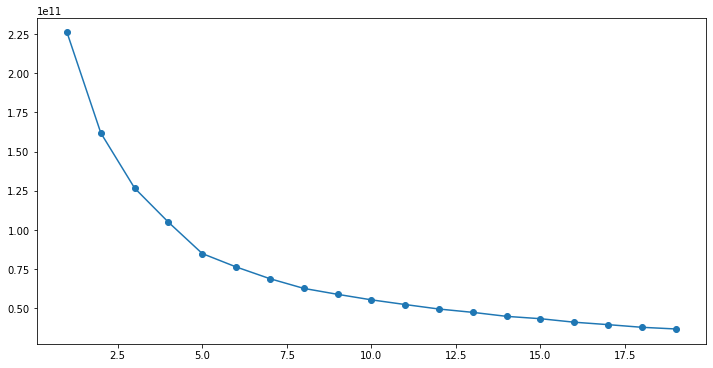

In [24]:
###################################### K-MEANS CLUSTER ANALYSIS ######################################################

#Feeding dataset after removing missing values and the outliers from it
#Estimating optimum no of clusters
cluster_range=range(1,20)
cluster_errors=[]
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters).fit(Credit_Card_Data1.iloc[:,0:11])
    cluster_errors.append(clusters.inertia_)

#Creating Dataframe
Cluster_Credit_Card_Data=pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})

#Plot line to visualize no of clusters
%matplotlib inline
plt.figure(figsize=(12,6))
plt.plot(Cluster_Credit_Card_Data.num_clusters,Cluster_Credit_Card_Data.cluster_errors,marker="o")





In [25]:
#Implementation of Kmeans

#According to the Elbow graph we deterrmine the clusters number as 4
#Applying k-means algorithm to the Credit_Card_Data1 dataset.
Kmeans_model=KMeans(n_clusters=4).fit(Credit_Card_Data1)



In [26]:
#Summarizing output
#pd.crosstab(Credit_Card_Data1["PURCHASES"],Kmeans_model.labels_)

#pd.crosstab(Credit_Card_Data1["ONEOFF_PURCHASES"],Kmeans_model.labels_)
#pd.crosstab(Credit_Card_Data1["INSTALLMENTS_PURCHASES"],Kmeans_model.labels_)

pd.crosstab(Credit_Card_Data1["PURCHASES_FREQUENCY"],Kmeans_model.labels_)
#pd.crosstab(Credit_Card_Data1["ONEOFF_PURCHASES_FREQUENCY"],Kmeans_model.labels_)
#pd.crosstab(Credit_Card_Data1["PURCHASES_INSTALLMENTS_FREQUENCY"],Kmeans_model.labels_)

#pd.crosstab(Credit_Card_Data1["CASH_ADVANCE_FREQUENCY"],Kmeans_model.labels_)
#pd.crosstab(Credit_Card_Data1["CASH_ADVANCE"],Kmeans_model.labels_)
#pd.crosstab(Credit_Card_Data1["CASH_ADVANCE_TRX"],Kmeans_model.labels_)

#pd.crosstab(Credit_Card_Data1["BALANCE"],Kmeans_model.labels_)

#pd.crosstab(Credit_Card_Data1["PAYMENTS"],Kmeans_model.labels_)

col_0,0,1,2,3
PURCHASES_FREQUENCY,,,,
0.000000,1432,66,0,545
0.083333,581,15,0,81
0.090909,29,3,0,11
0.100000,25,0,0,2
0.111111,17,0,0,1
0.125000,27,0,0,5
0.142857,26,0,0,0
0.166667,328,8,1,55
0.181818,13,1,0,2
